<a href="https://colab.research.google.com/github/Pongphan/ctransferlearning_ev/blob/main/ctransferlearning_ev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Recognition in EV's Egg Images

Pongphan Pongpanitanont

---

Biomedical Engineering, Medical Technology

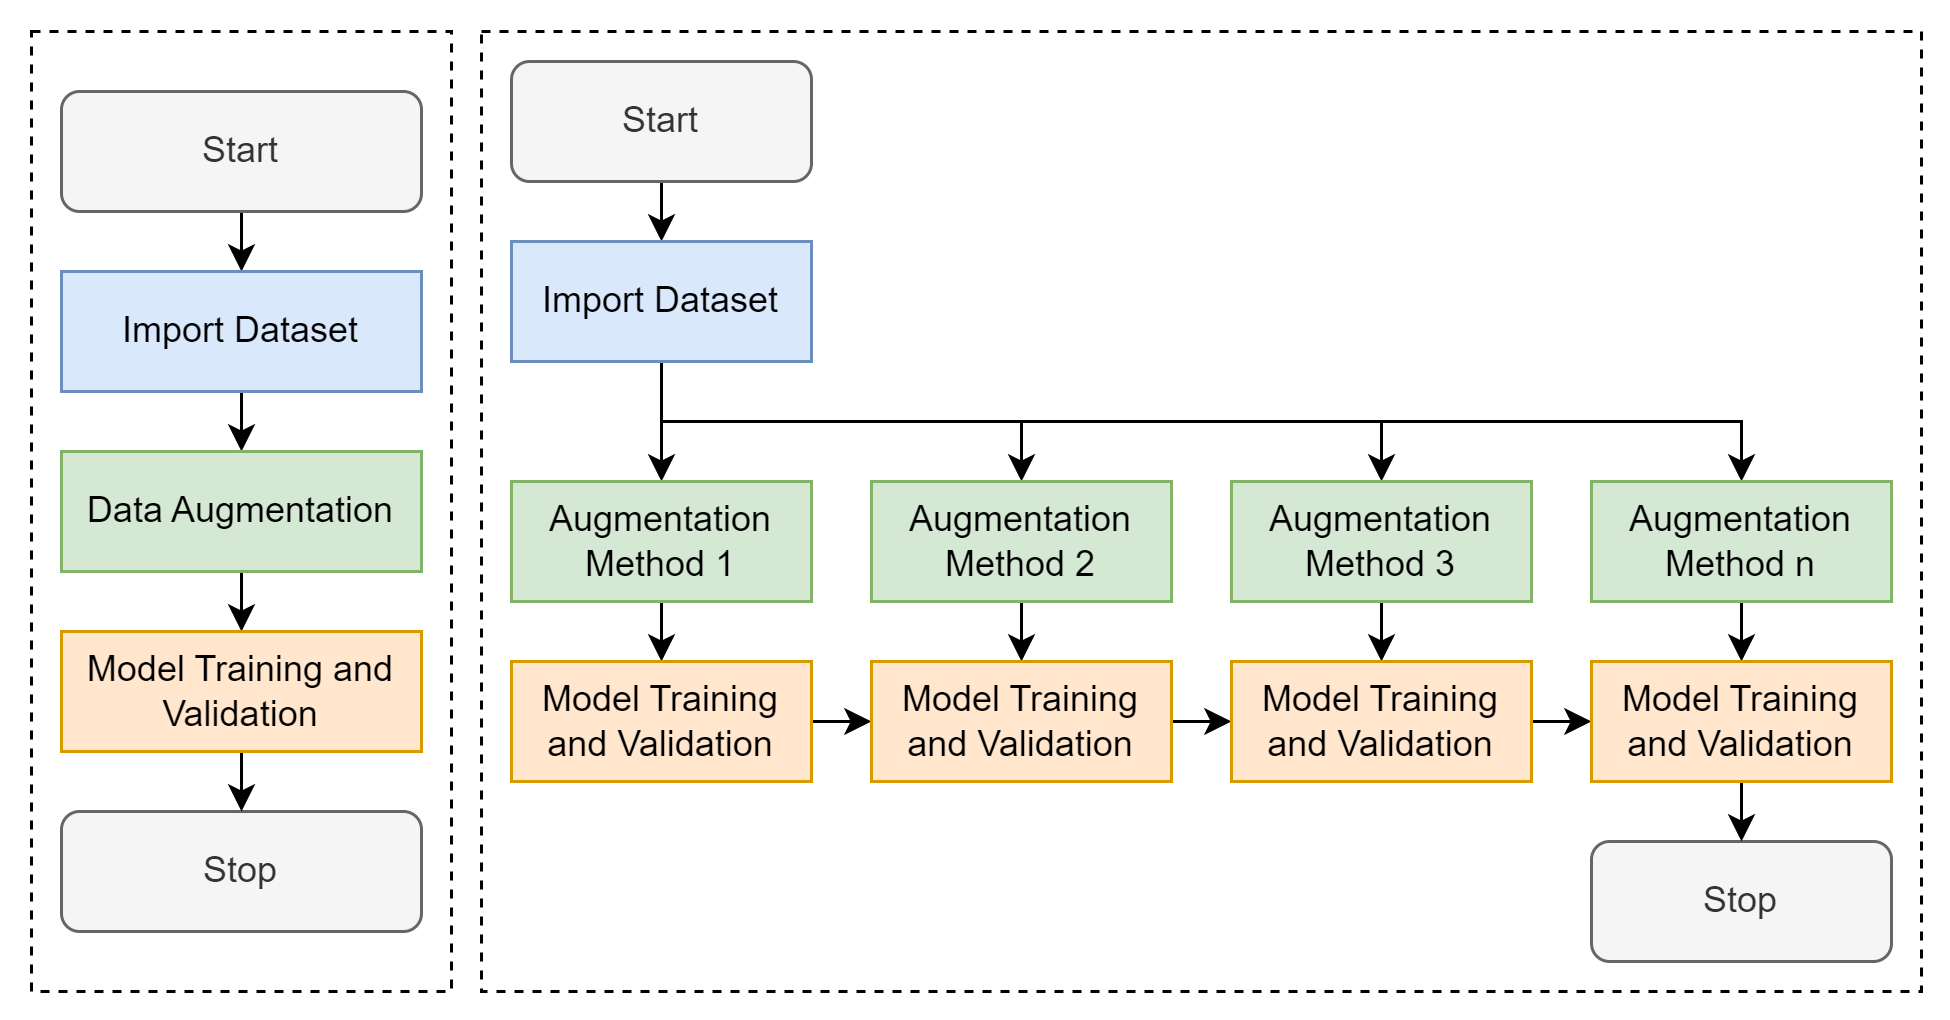

##Initial Condition

Mount with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Extract an Images to Destination Path

In [ ]:
!mkdir dataset
!unzip /content/drive/MyDrive/ev_images/ev_datasets/ev_images.zip -d dataset

Set Output Path

In [ ]:
path = "/content/drive/MyDrive/ev_images/ev_datasets/"

##Project Configuration

Setting k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=8)

Set Epoch

In [ ]:
set_epoch = 200

Model - CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (imsize,imsize,3)))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(8, (3, 3), activation = 'relu'))
  model.add(Conv2D(8, (3, 3), activation = 'relu'))
  model.add(Conv2D(8, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(256, activation = 'sigmoid'))
  model.add(Dense(64, activation = 'sigmoid'))
  model.add(Dense(16, activation = 'sigmoid'))
  model.add(Dense(2, activation = 'sigmoid'))

  model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])
  return model

Model - Resnet50

In [ ]:
from keras.applications import ResNet50

def resnet50():
  model = ResNet50(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - InceptionV3

In [ ]:
from keras.applications import InceptionV3

def inceptionv3():
  model = InceptionV3(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - VGG16

In [ ]:
from keras.applications import VGG16

def vgg16():
  model = VGG16(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - Densenet121

In [ ]:
from keras.applications import DenseNet121

def densenet121():
  model = DenseNet121(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model - Xception

In [ ]:
from keras.applications import Xception

def xception():
  model = Xception(weights=None, include_top=True, input_shape=(imsize,imsize,3), classes=2)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Setting Stop Training Condition

In [ ]:
from keras.callbacks import Callback

class earlystopping_manual(Callback):
  def __init__(self, monitor='loss', value=0.001, verbose=1):
    super(Callback, self).__init__()
    self.monitor = monitor
    self.value = value
    self.verbose = verbose

  def on_epoch_end(self, epoch, logs={}):
    current = logs.get(self.monitor)
    if current < self.value:
      self.model.stop_training = True

##Model: Conventional Learning

###Prepare Images Dataset

Load Images Function

In [ ]:
import os
import cv2

def loadimages(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

Import an Original Images

In [ ]:
img_0 = []
img_0 += loadimages("/content/dataset/01_training_dataset/Class0")

In [ ]:
img_1 = []
img_1 += loadimages("/content/dataset/01_training_dataset/Class1")

In [ ]:
img_0_label = []
img_0_label += [0 for i in img_0]

img_1_label = []
img_1_label += [1 for i in img_1]

In [ ]:
img = []
img += img_0
img += img_1

img_label = []
img_label += img_0_label
img_label += img_1_label

print(len(img),',',len(img_label))

Import an Augmented Images

In [ ]:
aug_img_0 = []
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_gb")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_gn")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_mf")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_r")
aug_img_0 += loadimages("/content/dataset/01_training_dataset/Class0_sp")

In [ ]:
aug_img_1 = []
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_gb")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_gn")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_mf")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_r")
aug_img_1 += loadimages("/content/dataset/01_training_dataset/Class1_sp")

In [ ]:
aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]

aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

In [ ]:
aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Import an Testing Images

In [ ]:
test_img_0 = []
test_img_0 += loadimages("/content/dataset/02_testing_dataset/Class0")

In [ ]:
test_img_1 = []
test_img_1 += loadimages("/content/dataset/02_testing_dataset/Class1")

In [ ]:
test_img_0_label = []
test_img_0_label += [0 for i in test_img_0]

test_img_1_label = []
test_img_1_label += [1 for i in test_img_1]

In [ ]:
test_img = []
test_img += test_img_0
test_img += test_img_1

test_img_label = []
test_img_label += test_img_0_label
test_img_label += test_img_1_label

print(len(test_img),',',len(test_img_label))

Preparing Input Images

In [ ]:
import numpy as np

imsize = 128

img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in img]
img = np.array(img, dtype=np.int32)

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

Preparing Output Images

In [ ]:
from keras.utils import to_categorical

img_label_cat = to_categorical(img_label)
img_label_cat = np.array(img_label_cat, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

###Model Training: A Comparison

####Training CNN with img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(img):
  x_train, x_test = img[train_ind], img[test_ind]
  y_train, y_test = img_label_cat[train_ind], img_label_cat[test_ind]

  model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/img_cnn.h5')

####Training CNN with Aug_img

In [ ]:
import datetime

current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_cnn.h5')

####Training Resnet50 with Aug_img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = resnet50()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_resnet50.h5')

####Training InceptionV3 with Aug_img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = inceptionv3()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_inceptionv3.h5')

####Training VGG16 with Aug_img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = vgg16()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_vgg16.h5')

####Training Densenet121 with Aug_img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = densenet121()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_densenet121.h5')

####Training Xception with Aug_img

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = xception()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/aug_img_xception.h5')

##Model: Cumulative Transfer learning

###Prepare Images Dataset

Load Images Function

In [ ]:
import os
import cv2

def loadimages(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

Set Image Size

In [ ]:
imsize = 128

Import an Training Images Path

In [ ]:
img_0_path = []
img_0_path += ["/content/dataset/01_training_dataset/Class0"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_r"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_gb"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_gn"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_mf"]
img_0_path += ["/content/dataset/01_training_dataset/Class0_sp"]

In [ ]:
img_1_path = []
img_1_path += ["/content/dataset/01_training_dataset/Class1"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_r"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_gb"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_gn"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_mf"]
img_1_path += ["/content/dataset/01_training_dataset/Class1_sp"]

Import an Testing Images

In [ ]:
test_img_0 = []
test_img_0 += loadimages("/content/dataset/02_testing_dataset/Class0")
test_img_1 = []
test_img_1 += loadimages("/content/dataset/02_testing_dataset/Class1")

test_img = []
test_img += test_img_0
test_img += test_img_1

test_img_0_label = []
test_img_0_label += [0 for i in test_img_0]
test_img_1_label = []
test_img_1_label += [1 for i in test_img_1]

test_img_label = []
test_img_label += test_img_0_label
test_img_label += test_img_1_label

print(len(test_img),',',len(test_img_label))

###Cumulative Transfer Learning: Iteration 0

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[0])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[0])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
import datetime

current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite0.keras')

###Cumulative Transfer Learning: Iteration 1

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[1])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[1])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite1.keras')

###Cumulative Transfer Learning: Iteration 2

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[2])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[2])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite2.keras')

###Cumulative Transfer Learning: Iteration 3

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[3])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[3])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite3.keras')

###Cumulative Transfer Learning: Iteration 4

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[4])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[4])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite4.keras')

###Cumulative Transfer Learning: Iteration 5

In [ ]:
aug_img_0 = []
aug_img_0 = loadimages(img_0_path[5])
aug_img_1 = []
aug_img_1 = loadimages(img_1_path[5])

aug_img = []
aug_img += aug_img_0
aug_img += aug_img_1

aug_img_0_label = []
aug_img_0_label += [0 for i in aug_img_0]
aug_img_1_label = []
aug_img_1_label += [1 for i in aug_img_1]

aug_img_label = []
aug_img_label += aug_img_0_label
aug_img_label += aug_img_1_label

print(len(aug_img),',',len(aug_img_label))

Preparing Input Output Images

In [ ]:
import numpy as np
from keras.utils import to_categorical

aug_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in aug_img]
aug_img = np.array(aug_img, dtype=np.int32)

test_img = [cv2.resize(i, (imsize,imsize), interpolation = cv2.INTER_AREA) for i in test_img]
test_img = np.array(test_img, dtype=np.int32)

aug_img_label_cat = to_categorical(aug_img_label)
aug_img_label_cat = np.array(aug_img_label_cat, dtype=np.int32)

test_img_label_cat = to_categorical(test_img_label)
test_img_label_cat = np.array(test_img_label_cat, dtype=np.int32)

Training CNN with Images

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fold_acc = []
i = 1

for train_ind, test_ind in cv.split(aug_img):
  x_train, x_test = aug_img[train_ind], aug_img[test_ind]
  y_train, y_test = aug_img_label_cat[train_ind], aug_img_label_cat[test_ind]

  #model = cnn()

  cond = [earlystopping_manual(monitor='loss', value=0.001, verbose=1)]
  history = model.fit(x_train, y_train, epochs = set_epoch, validation_data = (x_test, y_test), callbacks=[cond])

  plt.figure(figsize = (10,10))
  plt.subplot(5,1,i)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')
  plt.grid(True)

  i+=1

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(y_test, axis=1)

  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('--------------------------')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

  acc = accuracy_score(y_test, y_pred)
  fold_acc.append(acc)

In [ ]:
current_time = datetime.datetime.now().time()
print("time:", current_time)

Epoch-Accuracy Chart

In [ ]:
plt.plot(fold_acc, label='Accuracy')
plt.xlabel('Folding')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.grid(True)

print("Mean accuracy: {:.2f}".format(np.mean(fold_acc)))
print("Standard deviation: {:.2f}".format(np.std(fold_acc)))
print("Individual fold accuracies:", fold_acc)

ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Performance Matrix

In [ ]:
y_pred = model.predict(test_img)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_img_label_cat, axis=1)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Export Model Parameters

In [ ]:
from google.colab import files
model.save(path + '/cumulative_cnn_ite5.keras')